<hr style="border-width:2px;border-color:#75DFC1">

# Study Case

### Import packages

In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [561]:
!pip install plotly

### DataFrame observation

In [748]:
#read csv file 
df_training = pd.read_csv('validation.csv', sep = ',')
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,one,80.000000,45452.5,75,65,342741.0,True,3,1,149.0,300,3,2.2,2,unsat,little,considering
1,C100003,zero,536.842105,40703.5,90,0,215904.0,True,1,1,176.0,384,4,2.4,13,unsat,very_high,actively_looking_into_it
2,C100004,zero,256.578947,35563.0,52,0,341828.0,True,2,3,124.0,371,5,2.3,12,very_sat,avg,considering
3,C100005,zero,466.666667,66072.5,0,8,257222.0,True,3,1,279.0,324,1,2.8,5,very_sat,very_little,actively_looking_into_it
4,C100007,zero,150.000000,21901.5,0,0,800811.0,False,1,3,128.0,164,1,1.5,12,avg,very_high,perhaps


In [563]:
df_training.info()
df_training.describe()
df_training.dtypes
df_training.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME_CLIENT     

(11981, 19)

In [749]:
#pd.isnull(df_training['HOUSE']).values.ravel().sum()
#pd.notnull(df_training['HOUSE']).values.ravel().sum()

# Warning!! We havve NaN in some columns, we are going to delete these rows
# and see if these columns are important or not
df_training = df_training[df_training['HOUSE'].notna()]
df_training = df_training[df_training['LESSTHAN600k'].notna()]
df_training.reset_index(inplace=True, drop=True)

### Data Cleaning 

In [750]:
df_training['COLLEGE'] = df_training['COLLEGE'].map({'zero' : float(0), 'one': float(1)})
df_training['DATA'] = df_training['DATA'].round(2)
columns_to_float = ['OVERCHARGE', 'LEFTOVER', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']
df_training[columns_to_float] = df_training[columns_to_float].astype(float)
df_training['LESSTHAN600k'] = df_training['LESSTHAN600k'].astype(float)
df_training['CHILD'] = df_training['CHILD'].astype(float)
df_training['JOB_CLASS'] = df_training['JOB_CLASS'].astype(float)
df_training['DATA'] = df_training['DATA'].round(2)

#df_training['REPORTED_SATISFACTION'].unique()


In [ ]:

df_training['CHURNED'] = df_training['CHURNED'].map({'LEAVE' : float(0), 'STAY': float(1)})

In [751]:
# list(df_training['REPORTED_SATISFACTION'].unique()) 
# list(df_training['REPORTED_USAGE_LEVEL'].unique()) 
# list(df_training['CONSIDERING_CHANGE_OF_PLAN'].unique()) 

df_training['CONSIDERING_CHANGE_OF_PLAN'] = df_training['CONSIDERING_CHANGE_OF_PLAN'].map({
                                                    'actively_looking_into_it' : float(1),
                                                    'considering': float(.75),
                                                    'perhaps': float(.5),
                                                    'no': float(.25),
                                                    'never_thought': float(0),
                                                    })

df_training['REPORTED_USAGE_LEVEL'] = df_training['REPORTED_USAGE_LEVEL'].map({
                                                    'very_little' : float(1),
                                                    'little': float(.75),
                                                    'avg': float(.5),
                                                    'high' : float(.25),
                                                    'very_high': float(0),
                                                    })

df_training['REPORTED_SATISFACTION'] = df_training['REPORTED_SATISFACTION'].map({
                                                    'very_unsat' : float(1),
                                                    'unsat': float(.75),
                                                    'avg': float(.5),
                                                    'sat' : float(.25),
                                                    'very_sat': float(0),
                                                    })

In [752]:
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,1.0,80.00,45452.5,75.0,65.0,342741.0,1.0,3.0,1.0,149.0,300.0,3.0,2.2,2.0,0.75,0.75,0.75
1,C100003,0.0,536.84,40703.5,90.0,0.0,215904.0,1.0,1.0,1.0,176.0,384.0,4.0,2.4,13.0,0.75,0.00,1.00
2,C100004,0.0,256.58,35563.0,52.0,0.0,341828.0,1.0,2.0,3.0,124.0,371.0,5.0,2.3,12.0,0.00,0.50,0.75
3,C100005,0.0,466.67,66072.5,0.0,8.0,257222.0,1.0,3.0,1.0,279.0,324.0,1.0,2.8,5.0,0.00,1.00,1.00
4,C100007,0.0,150.00,21901.5,0.0,0.0,800811.0,0.0,1.0,3.0,128.0,164.0,1.0,1.5,12.0,0.50,0.00,0.50


In [568]:
# #Dummies 
# def createDummies(df, col, var_name):
#     dummy = pd.get_dummies(df[col], prefix=var_name)
#     df = df.drop(col, axis = 1)
#     df = pd.concat([df, dummy ], axis = 1)
#     return df

# df_training = createDummies(df_training, 'REPORTED_SATISFACTION', var_name='Report_Satisf')
# df_training = createDummies(df_training, 'CONSIDERING_CHANGE_OF_PLAN', var_name='Change_Plan')
# df_training = createDummies(df_training, 'REPORTED_USAGE_LEVEL', var_name='Report_Usage')

### Select main features

Features deleted by intuition for the model :
 
 * ***CUSTOMER_ID*** :  nothing relevant to the analysis
 * ***COLLEGE*** :  I think it's not important, this feature you can know thanks to clients' revenue
 * ***LESSTHAN600k*** : It's a feature that depends directly on HOUSE feature. (Good news! It's a feature with NaN) 
 * ***JOB_CLASS*** : I think the job_class is not very important. it's more important the income. Demonstrate both features are correlated.!!

 

* Afficher un *strip plot* permettant de visualiser le nombre de points marqués par les joueurs, en fonction de leurs postes (variable `pos`).

In [753]:
remCol = []
for col in df_training.columns:
    if (col=="CUSTOMER_ID") | (col=="COLLEGE")  |  (col=="LESSTHAN600k" ) |  (col=="JOB_CLASS" ):
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column CUSTOMER_ID deleted
column COLLEGE deleted
column LESSTHAN600k deleted
column JOB_CLASS deleted


In [754]:
df_training['DATA'][df_training['DATA'] != df_training['DATA'].max()].describe()

count    3793.000000
mean      500.226404
std       444.749886
min         0.000000
25%       183.050000
50%       368.750000
75%       679.490000
max      4140.000000
Name: DATA, dtype: float64

In [571]:
df_training.head()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,660.00,19995.0,0.0,0.0,897338.0,4.0,160.0,155.0,1.0,1.2,15.0,1.00,0.75,0.75,1.0
1,317.65,31477.0,155.0,15.0,393396.0,0.0,100.0,245.0,27.0,2.7,4.0,0.75,0.75,0.75,0.0
2,208.70,66742.0,0.0,13.0,937197.0,4.0,127.0,493.0,20.0,2.6,4.0,0.50,1.00,0.75,1.0
3,265.02,40864.0,183.0,0.0,986430.0,3.0,86.0,390.0,13.0,2.5,12.0,0.75,0.00,0.75,0.0
4,440.00,43321.5,200.0,0.0,394622.0,2.0,77.0,175.0,18.0,2.4,10.0,1.00,0.75,1.00,0.0


(array([8.350e+03, 2.271e+03, 5.700e+02, 1.210e+02, 2.700e+01, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.,  660., 1320., 1980., 2640., 3300., 3960., 4620., 5280.,
        5940., 6600.]),
 <BarContainer object of 10 artists>)

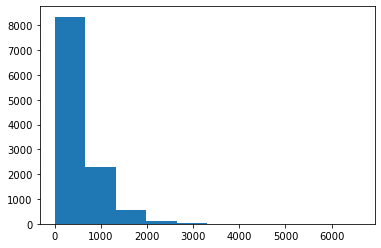

In [572]:
plt.hist(df_training['DATA'])

In [573]:
corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

### Normalize data

In [755]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_training)
df_normalized = pd.DataFrame(normalized_data, columns=remCol)

In [756]:
scaler.inverse_transform(df_normalized)

array([[8.00000e+01, 4.54525e+04, 7.50000e+01, ..., 7.50000e-01,
        7.50000e-01, 7.50000e-01],
       [5.36840e+02, 4.07035e+04, 9.00000e+01, ..., 7.50000e-01,
        0.00000e+00, 1.00000e+00],
       [2.56580e+02, 3.55630e+04, 5.20000e+01, ..., 0.00000e+00,
        5.00000e-01, 7.50000e-01],
       ...,
       [1.02760e+02, 3.80305e+04, 2.35000e+02, ..., 0.00000e+00,
        2.50000e-01, 7.50000e-01],
       [1.20000e+03, 6.22030e+04, 7.00000e+01, ..., 1.00000e+00,
        7.50000e-01, 7.50000e-01],
       [1.42110e+02, 5.14630e+04, 0.00000e+00, ..., 1.00000e+00,
        7.50000e-01, 2.50000e-01]])

In [757]:
df_normalized.head()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0.016064,0.373632,0.249169,0.730337,0.226723,0.428571,0.237037,0.221066,0.103448,0.109756,0.071429,0.75,0.75,0.75
1,0.107799,0.323570,0.299003,0.000000,0.077472,0.142857,0.303704,0.330299,0.137931,0.121951,0.857143,0.75,0.00,1.00
2,0.051522,0.269382,0.172757,0.000000,0.225648,0.285714,0.175309,0.313394,0.172414,0.115854,0.785714,0.00,0.50,0.75
3,0.093709,0.590997,0.000000,0.089888,0.126092,0.428571,0.558025,0.252276,0.034483,0.146341,0.285714,0.00,1.00,1.00
4,0.030120,0.125370,0.000000,0.000000,0.765738,0.142857,0.185185,0.044213,0.034483,0.067073,0.785714,0.50,0.00,0.50


### Matriz de correlación

In [577]:
corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

### Seaborn graph and graphs

(array([8.350e+03, 2.271e+03, 5.700e+02, 1.210e+02, 2.700e+01, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.,  660., 1320., 1980., 2640., 3300., 3960., 4620., 5280.,
        5940., 6600.]),
 <BarContainer object of 10 artists>)

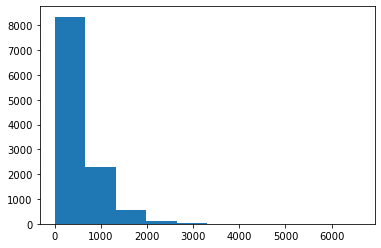

In [578]:
plt.hist(df_training['DATA'])

### PCA

In [579]:
pca = PCA(n_components="mle", svd_solver="full")


In [580]:
pca.fit(np.array(df_training))

PCA(n_components='mle', svd_solver='full')

In [581]:
pca.components_

array([[-7.29399457e-05, -1.72447866e-03,  1.15918611e-05,
         1.62074710e-06,  9.99998510e-01,  4.21513481e-08,
        -2.58814504e-07, -2.31761131e-05,  1.11899018e-06,
         4.00967663e-08, -2.52432474e-07, -5.50625962e-08,
        -9.92090944e-10, -3.37718561e-08,  3.70783658e-07],
       [-2.68380491e-03,  9.99974227e-01,  1.40280456e-03,
         1.40784910e-05,  1.72437008e-03,  1.04016528e-07,
         7.57788898e-06,  6.27592630e-03,  1.12688725e-04,
         1.69012453e-07, -3.45786750e-06,  7.17923924e-07,
         1.19451386e-07,  2.30807990e-07, -3.54814381e-06],
       [ 9.96588944e-01,  2.43239541e-03, -6.14463275e-02,
        -1.56456781e-02,  7.88451228e-05, -7.05722911e-04,
         6.46376826e-04,  5.24455783e-02, -4.81646087e-03,
         1.97548775e-03,  2.35680084e-03,  2.62133642e-06,
         3.09534924e-06,  2.67142180e-06, -6.91997430e-05],
       [-6.38152950e-02, -6.01676458e-03, -2.02670908e-01,
         9.32911098e-03,  9.96215378e-06,  3.03301354

In [582]:
pca.n_components_

14

In [583]:
pca.singular_values_

array([2.73534419e+07, 2.37495014e+06, 4.84624384e+04, 1.68275271e+04,
       7.23542846e+03, 5.09774617e+03, 2.74258885e+03, 5.88450367e+02,
       3.46279485e+02, 1.49138978e+02, 1.16933947e+02, 4.94031504e+01,
       4.02420195e+01, 3.82942894e+01])

In [584]:
pca.explained_variance_ratio_

array([9.92514324e-01, 7.48207080e-03, 3.11546835e-06, 3.75624074e-07,
       6.94450554e-08, 3.44722185e-08, 9.97778705e-09, 4.59338128e-10,
       1.59061966e-10, 2.95049680e-11, 1.81381939e-11, 3.23759194e-12,
       2.14818834e-12, 1.94527431e-12])

## Logistic Regression

In [645]:
selectedCols = ['DATA','INCOME', 'HOUSE', 'OVERCHARGE', 'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'HANDSET_PRICE']
X = df_normalized[selectedCols]
Y = df_normalized[['CHURNED']]

In [646]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=100)

In [647]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
clf_LR = LogisticRegression(random_state=1).fit(x_train, y_train)

C:\Users\marta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [648]:
clf_LR.score(x_train, y_train)

0.7085720581754077

In [649]:
clf_LR.score(x_test, y_test)

0.711453744493392

In [650]:
y_pred_LR = clf_LR.predict(x_test)

In [651]:
y_proba_LR = clf_LR.predict_proba(x_test)

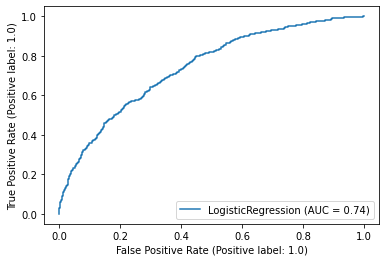

In [652]:
metrics.plot_roc_curve(clf_LR, x_test, y_test) 

## Random Forest Regressor

In [653]:
from sklearn.ensemble import RandomForestClassifier

In [654]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=100)
clf_RF.fit(x_train, y_train)

C:\Users\marta\AppData\Local\Temp/ipykernel_3972/817421866.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=15, random_state=100)

In [655]:
clf_RF.score(x_train, y_train)

0.9643014543851918

In [656]:
y_proba_RF = clf_RF.predict_proba(x_test)

In [657]:
y_pred_RF = clf_RF.predict(x_test)
roc_auc_score(y_pred_RF, y_test)

0.7451656168666309

In [658]:
clf_RF.score(x_test, y_test)

0.7665198237885462

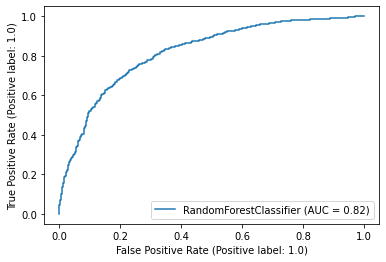

In [659]:
from sklearn import metrics 
metrics.plot_roc_curve(clf_RF, x_test, y_test) 

In [660]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.38).astype('int')
accuracy_score(predThresH, y_test)

0.7506607929515419

In [661]:
roc_auc_score(predThresH, y_test)

0.7567174357808593

##  XGboost

In [602]:
import xgboost as xgb

# Init classifier
xgb_cl = xgb.XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.9, gamma=0.4,
              learning_rate=0.0400000012, max_delta_step=20, max_depth=14,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=75,  reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_train)

In [603]:
roc_auc_score(preds, y_train)

0.973534364105108

In [604]:
preds = xgb_cl.predict(x_test)
roc_auc_score(preds, y_test)

0.7311892032906163

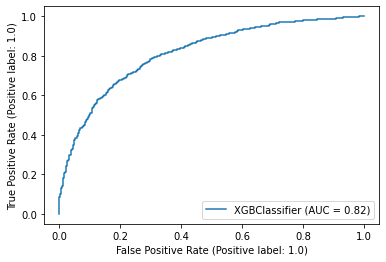

In [605]:
metrics.plot_roc_curve(xgb_cl, x_test, y_test) 

In [606]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.38).astype('int')
accuracy_score(predThresH, y_test)

0.7506607929515419

In [607]:
roc_auc_score(predThresH, y_test)

0.7567174357808593

# Client discount

### We want offer discounts to clients with a high churn probability  => threshold = 0.35

In [758]:
xToAnalyse = df_normalized.copy()

In [759]:
xToAnalyse["CHURN_LABEL"] = (clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1] >= 0.4).astype('int')

In [760]:
xToAnalyse["CHURN_PROBABILITY"] = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]

In [761]:
xToAnalyse["CHURN_PROBABILITY"].head(10)

0    0.446833
1    0.380308
2    0.779372
3    0.951757
4    0.934834
5    0.938314
6    0.825679
7    0.496830
8    0.698831
9    0.592017
Name: CHURN_PROBABILITY, dtype: float64

In [762]:
originalFacture = df_training["OVERCHARGE"] + df_training["REVENUE"]

In [763]:
discList = [0, 5, 10, 15, 20, 25, 30,35, 40, 45,50]
#discList = [0]
for disc in discList:
    beforeExpValue = np.multiply(xToAnalyse["CHURN_PROBABILITY"],originalFacture)
    xToAnalyse.iloc[:]["OVERCHARGE"]  = xToAnalyse["OVERCHARGE"]*(1.-float(disc)/float(100.))
    afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]
    if disc == 0:
        afterExpValue = beforeExpValue
    else:
        afterExpValue = np.multiply(afterProba,originalFacture)*(1.-float(disc)/float(100.)) - 10.
        
    benefit = afterExpValue - beforeExpValue
    xToAnalyse["disc_"+str(disc)] = disc
    xToAnalyse[str(disc)] = benefit
    

In [764]:
colsDisc = []
[colsDisc.append(str(disc)) for disc in discList]

[None, None, None, None, None, None, None, None, None, None, None]

In [765]:
colsDisc

['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50']

In [766]:
xToAnalyse["maxBenefit"] = xToAnalyse[colsDisc].loc[:].max(axis=1)

In [767]:
xToAnalyse["DISCOUNT"] = xToAnalyse[colsDisc].loc[:].idxmax(axis=1).astype(int)

<AxesSubplot:>

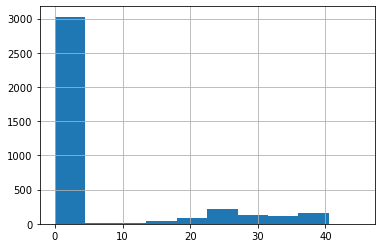

In [768]:
xToAnalyse["DISCOUNT"].hist()

<AxesSubplot:>

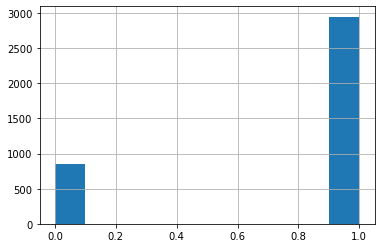

In [769]:
xToAnalyse["CHURN_LABEL"].hist()

In [770]:
xToAnalyse[colsDisc].head(20)

,0,5,10,15,20,25,30,35,40,45,50
0,0.0,-18.306144,-20.584282,-14.823262,-10.092976,-10.197985,-13.464680,-25.018301,-34.958096,-41.219130,-47.480164
1,0.0,-17.817737,-17.535979,-22.565885,-32.489084,-34.132757,-9.843021,-21.269647,-32.463485,-39.021682,-45.579878
2,0.0,-14.018168,-12.381160,-20.515839,-28.821806,-36.281395,-40.510336,-44.848261,-52.719127,-60.589993,-68.460859
3,0.0,-23.277008,-36.554016,-49.831025,-63.108033,-76.385041,-89.662049,-102.939058,-116.216066,-129.493074,-142.770082
4,0.0,-15.982939,-21.965879,-27.948818,-33.931757,-39.914697,-45.897636,-51.880576,-57.863515,-63.846454,-69.829394
5,0.0,-20.180710,-30.361419,-40.542129,-50.722838,-60.903548,-71.084257,-81.264967,-91.445677,-101.626386,-111.807096
6,0.0,-14.376096,-18.752192,-23.128289,-27.504385,-31.880481,-36.256577,-40.632673,-45.008770,-49.384866,-53.760962
7,0.0,-14.785849,-14.869248,-30.546225,-47.534222,-48.594914,-82.637581,-69.689375,-73.665630,-93.668246,-104.841904
8,0.0,-14.996642,-19.993284,-24.989926,-29.986568,-34.983211,-39.979853,-44.976495,-49.973137,-54.969779,-59.966421
9,0.0,-13.710441,-12.796281,-20.441488,-26.878531,-34.930551,-46.156149,-49.711801,-55.491765,-61.271728,-67.051691


In [771]:
xToAnalyse["CLIENT_TO_CONTACT"] = 'NO'
xToAnalyse["CLIENT_TO_CONTACT"][xToAnalyse["DISCOUNT"]!=0] = 'YES'

C:\Users\marta\AppData\Local\Temp/ipykernel_3972/1220258670.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [772]:
xToAnalyse.columns

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'CHILD', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURN_LABEL',
       'CHURN_PROBABILITY', 'disc_0', '0', 'disc_5', '5', 'disc_10', '10',
       'disc_15', '15', 'disc_20', '20', 'disc_25', '25', 'disc_30', '30',
       'disc_35', '35', 'disc_40', '40', 'disc_45', '45', 'disc_50', '50',
       'maxBenefit', 'DISCOUNT', 'CLIENT_TO_CONTACT'],
      dtype='object')

In [773]:
RESULTS_CSV = xToAnalyse[["CHURN_PROBABILITY", "CHURN_LABEL", "CLIENT_TO_CONTACT", "DISCOUNT"]]

In [774]:
RESULTS_CSV.to_csv("results.csv", sep=";")

In [684]:
reslist = []
iClient = 8
nbDisc = 10
maxBenefit = 0
discOpt = 0
for disc in range(nbDisc+1):
        beforeExpValue = xToAnalyse["proba"][iClient]*originalFacture[iClient]
        afterPrice  = xToAnalyse["OVERCHARGE"][iClient]*(1.-float(disc)/float(nbDisc))
        xToAnalyse[selectedCols].iloc[iClient]["OVERCHARGE"] = afterPrice
        afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols].loc[iClient:iClient])[:,1][0]
        afterExpValue = afterProba*originalFacture[iClient]*(1.-float(disc)/float(nbDisc)) - 10.
        benefit = afterExpValue - beforeExpValue
        #reslist.append([disc, beforeExpValue, afterPrice, afterProba, afterExpValue, benefit])
        reslist.append([disc, benefit])

In [685]:
reslist

[[0, -10.0],
 [1, -11.167004273504274],
 [2, -12.334008547008546],
 [3, -13.501012820512821],
 [4, -14.668017094017095],
 [5, -15.835021367521367],
 [6, -17.00202564102564],
 [7, -18.169029914529915],
 [8, -19.33603418803419],
 [9, -20.50303846153846],
 [10, -21.670042735042735]]